In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd

In [4]:
import datetime as dt
import scipy.stats as sts

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [6]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
Base = automap_base()
Base.prepare(engine, reflect=True)

In [8]:
 connection=engine.connect()

In [9]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [10]:
measurement = Base.classes.measurement
station = Base.classes.station

In [11]:
# Create a session
session = Session(engine)

In [12]:
first_row_measurement = session.query(measurement).first()
first_row_measurement.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x13ece5afc10>,
 'prcp': 0.08,
 'station': 'USC00519397',
 'tobs': 65.0,
 'date': '2010-01-01',
 'id': 1}

In [13]:
first_row_station = session.query(station).first()
first_row_station.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x13ecc1f57f0>,
 'elevation': 3.0,
 'longitude': -157.8168,
 'latitude': 21.2716,
 'station': 'USC00519397',
 'id': 1,
 'name': 'WAIKIKI 717.2, HI US'}

In [14]:
for row in session.query(measurement).limit(5).all():
    print(row)

# Exploratory Climate Analysis

In [ ]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


In [116]:
# Calculate the date 1 year ago from the last data point in the database
max_date = pd.read_sql(" select max(date) as max_date from measurement  ", connection)
max_date

,max_date
0,2017-08-23


In [56]:
max_date2 = session.query(func.max(measurement.date)).all()
max_date2

[('2017-08-23')]

In [125]:
# Perform a query to retrieve the data and precipitation scores
df_rain = pd.read_sql(" select measurement.date, measurement.prcp,\
        (select max(date) as max_date from measurement) as max_date from measurement \
        where measurement.date >= DATE(max_date, '-12 month') \
        order by measurement.date ASC ", connection)
df_rain

,date,prcp,max_date
0,2016-08-23,0.00,2017-08-23
1,2016-08-23,0.15,2017-08-23
2,2016-08-23,0.05,2017-08-23
3,2016-08-23,NaN,2017-08-23
4,2016-08-23,0.02,2017-08-23
...,...,...,...
2225,2017-08-22,0.50,2017-08-23
2226,2017-08-23,0.00,2017-08-23
2227,2017-08-23,0.00,2017-08-23
2228,2017-08-23,0.08,2017-08-23


In [128]:
#Clean up the data
df_rain = df_rain.dropna()
df_rain = df_rain.drop(columns = max_date)
#df_rain = df_rain.groupby(['date']).sum().reset_index()
df_rain

,date,prcp
0,2016-08-23,0.00
1,2016-08-23,0.15
2,2016-08-23,0.05
4,2016-08-23,0.02
5,2016-08-23,1.79
...,...,...
2225,2017-08-22,0.50
2226,2017-08-23,0.00
2227,2017-08-23,0.00
2228,2017-08-23,0.08


C:\Users\zarre\anaconda3\envs\PythonData\lib\site-packages\pandas\plotting\_matplotlib\core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


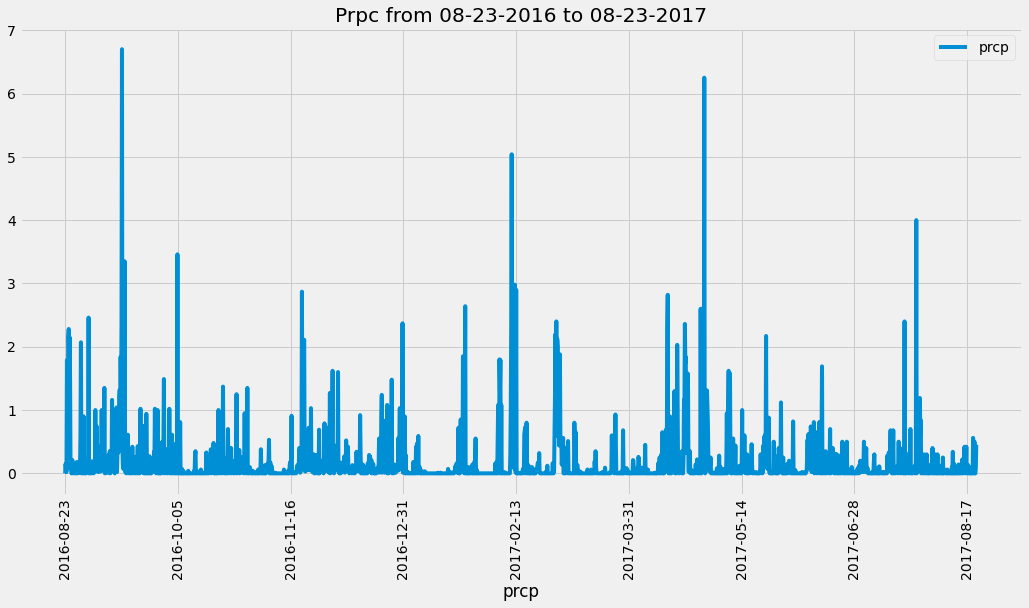

In [129]:
#df_rain.set_index('date', inplace=True)

df_rain.plot( x = 'date', y = 'prcp', rot = 90, figsize =(16,8))
plt.xlabel('date')
plt.xlabel('prcp')

plt.title("Prpc from 08-23-2016 to 08-23-2017")

#df_rain.plot.bar()

#plt.tight_layout()

plt.show()

In [138]:
#All precipitation data
df_measurement=pd.read_sql(" select * from measurement ", connection)
df_measurement.dropna()

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
5,6,USC00519397,2010-01-07,0.06,70.0
...,...,...,...,...,...
19543,19544,USC00516128,2017-08-17,0.13,72.0
19545,19546,USC00516128,2017-08-19,0.09,71.0
19547,19548,USC00516128,2017-08-21,0.56,76.0
19548,19549,USC00516128,2017-08-22,0.50,76.0


## Use Pandas to calcualte the summary statistics for the precipitation data
###Using only the last 12 months of data
###Calculation below

In [133]:
 # Demonstrate calculating measures of central tendency
mean_numpy = np.mean(df_rain['prcp'])
print(f"The mean prcp in HI is {mean_numpy}")

median_numpy = np.median(df_rain['prcp'])
print(f"The median prcp in HI is {median_numpy}")

mode_scipy = sts.mode(df_rain['prcp'])
print(f"The mode prcp in HI is {mode_scipy}")

The mean prcp in HI is 0.17727857496288896
The median prcp in HI is 0.02
The mode prcp in HI is ModeResult(mode=array([0.]), count=array([874]))


In [139]:
 # Determine if there are any potential outliers
quartiles = df_rain['prcp'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of occupancy is: {lowerq}")
print(f"The upper quartile of occupancy is: {upperq}")
print(f"The interquartile range of occupancy is: {iqr}")
print(f"The the median of occupancy is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

outlier_data = df_rain.loc[(df_rain['prcp'] < lower_bound) | (df_rain['prcp']> upper_bound)]
outlier_data

The lower quartile of occupancy is: 0.0
The upper quartile of occupancy is: 0.13
The interquartile range of occupancy is: 0.13
The the median of occupancy is: 0.02 
Values below -0.195 could be outliers.
Values above 0.325 could be outliers.


,date,prcp
5,2016-08-23,1.79
6,2016-08-23,0.70
8,2016-08-24,2.15
9,2016-08-24,2.28
11,2016-08-24,1.22
...,...,...
2199,2017-08-15,0.42
2203,2017-08-16,0.42
2222,2017-08-21,0.56
2225,2017-08-22,0.50


### Station Analysis 

In [107]:
# Design a query to show how many stations are available in this dataset?
df_station_cnt=pd.read_sql(" select count(station) as num_stations \
    from (select DISTINCT station from measurement) ", connection)
df_station_cnt

,num_stations
0,9


In [46]:
# Design a query to show how many stations are available in this dataset?
df_station_cnt2 = session.query(measurement.station).distinct(measurement.station).count()
                                
df_station_cnt2

9

In [74]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

df_active_station = pd.read_sql("SELECT measurement.station, station.name, count(measurement.prcp) as freq \
    from measurement inner join station on measurement.station = station.station \
    where measurement.prcp is not Null \
    group by measurement.station \
    order by freq DESC ", connection)

df_active_station


,station,name,freq
0,USC00519281,"WAIHEE 837.5, HI US",2772
1,USC00513117,"KANEOHE 838.1, HI US",2696
2,USC00519397,"WAIKIKI 717.2, HI US",2685
3,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",2572
4,USC00516128,"MANOA LYON ARBO 785.2, HI US",2484
5,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",1937
6,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",1932
7,USC00517948,"PEARL CITY, HI US",683
8,USC00518838,"UPPER WAHIAWA 874.3, HI US",342


In [54]:
df_active_station2 = session.query(measurement.station,func.count(measurement.prcp)).filter(measurement.prcp != 'NOT NULL').group_by(measurement.station).order_by(func.count(measurement.prcp).desc()).all()
df_active_station2

[('USC00519281', 2772),
 ('USC00513117', 2696),
 ('USC00519397', 2685),
 ('USC00519523', 2572),
 ('USC00516128', 2484),
 ('USC00514830', 1937),
 ('USC00511918', 1932),
 ('USC00517948', 683),
 ('USC00518838', 342)]

###Most active station is Waihee USC00519281 with the most freq prcp count

In [85]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?

df_temp_station = pd.read_sql("SELECT station, min(tobs) as Min_temp, max(tobs) as Max_temp, avg(tobs) as Avg_temp \
FROM measurement where station = 'USC00519281'  ", connection)

df_temp_station

,station,Min_temp,Max_temp,Avg_temp
0,USC00519281,54.0,85.0,71.663781


In [25]:
df_temp_station2 = session.query(func.max(measurement.tobs),func.min(measurement.tobs),func.avg(measurement.tobs)).filter(measurement.station == 'USC00519281' ).all()

print("Max, Min, Avg Temp for Station USC00519281" + str(df_temp_station2))

Max, Min, Avg Temp for Station USC00519281[(85.0, 54.0, 71.66378066378067)]


In [86]:
# Choose the station with the highest number of temperature observations.

df_temp_allstations = pd.read_sql(" SELECT measurement.station, station.name, count(measurement.tobs) as freq_temp \
    from measurement inner join station on measurement.station = station.station \
    where measurement.tobs is not Null \
    group by measurement.station \
    order by freq_temp DESC ", connection)

df_temp_allstations
    

,station,name,freq_temp
0,USC00519281,"WAIHEE 837.5, HI US",2772
1,USC00519397,"WAIKIKI 717.2, HI US",2724
2,USC00513117,"KANEOHE 838.1, HI US",2709
3,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",2669
4,USC00516128,"MANOA LYON ARBO 785.2, HI US",2612
5,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",2202
6,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",1979
7,USC00517948,"PEARL CITY, HI US",1372
8,USC00518838,"UPPER WAHIAWA 874.3, HI US",511


In [55]:
df_temp_allstations2 = session.query(measurement.station,func.count(measurement.tobs)).filter(measurement.tobs != 'NOT NULL').group_by(measurement.station).order_by(func.count(measurement.tobs).desc()).all()
df_temp_allstations2

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [95]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
df_temp_12mo = pd.read_sql("SELECT station, date, tobs, \
    (select max(date) as max_date from measurement) as max_date from measurement \
    where measurement.date > DATE(max_date, '-12 month') AND station = 'USC00519281'\
    order by date asc  ", connection)
df_temp_12mo = df_temp_12mo.drop(columns = max_date)
df_temp_12mo = df_temp_12mo.drop(columns = "station")
df_temp_12mo                               

,date,tobs
0,2016-08-24,77.0
1,2016-08-25,80.0
2,2016-08-26,80.0
3,2016-08-27,75.0
4,2016-08-28,73.0
...,...,...
346,2017-08-14,77.0
347,2017-08-15,77.0
348,2017-08-16,76.0
349,2017-08-17,76.0


Text(0.5, 1.0, '12 months')

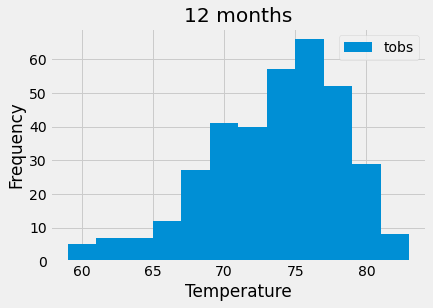

In [106]:
df_temp_12mo.hist(bins = 12, legend= True)
plt.xlabel("Temperature")
plt.ylabel('Frequency')
plt.title("12 months")


### Step 2 - Climate App

### App.py saved in another file outside of this notebook

## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
